In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
file_path = r'C:\Users\tinao\OneDrive\Radna površina\data mining project\dataset_heart.csv'  # r is there to prevent escape sequence mistakesh
heart = pd.read_csv(file_path)

In [3]:
heart.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [5]:
# print the number of rows and columns
print("Number of Rows: ", heart.shape[0])
print("Number of Columns: ", heart.shape[1])

Number of Rows:  270
Number of Columns:  14


In [6]:
heart.isnull().sum()


age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

In [7]:
heart.isnull().sum().sum()


0

In [8]:
heart.describe().T.style.background_gradient(cmap = "Blues")


,count,mean,std,min,25%,50%,75%,max
age,270.000000,54.433333,9.109067,29.000000,48.000000,55.000000,61.000000,77.000000
sex,270.000000,0.677778,0.468195,0.000000,0.000000,1.000000,1.000000,1.000000
chest pain type,270.000000,3.174074,0.950090,1.000000,3.000000,3.000000,4.000000,4.000000
resting blood pressure,270.000000,131.344444,17.861608,94.000000,120.000000,130.000000,140.000000,200.000000
serum cholestoral,270.000000,249.659259,51.686237,126.000000,213.000000,245.000000,280.000000,564.000000
fasting blood sugar,270.000000,0.148148,0.355906,0.000000,0.000000,0.000000,0.000000,1.000000
resting electrocardiographic results,270.000000,1.022222,0.997891,0.000000,0.000000,2.000000,2.000000,2.000000
max heart rate,270.000000,149.677778,23.165717,71.000000,133.000000,153.500000,166.000000,202.000000
exercise induced angina,270.000000,0.329630,0.470952,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,270.000000,1.050000,1.145210,0.000000,0.000000,0.800000,1.600000,6.200000


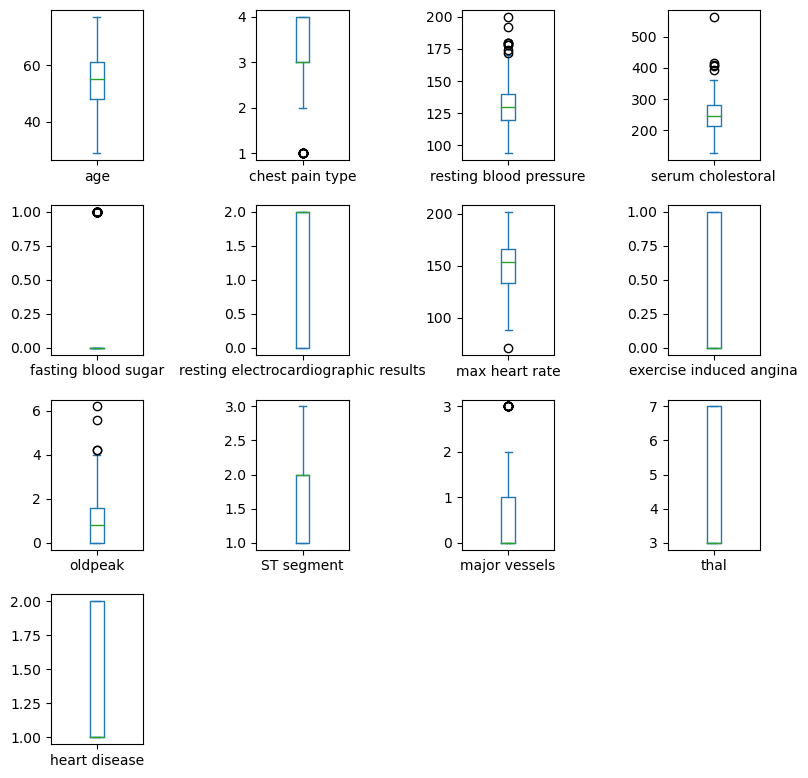

In [10]:
#Take the column values 
names = ['age', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease']

# Set the custom font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Create the box plots
heart.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(8, 8), y=names)

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

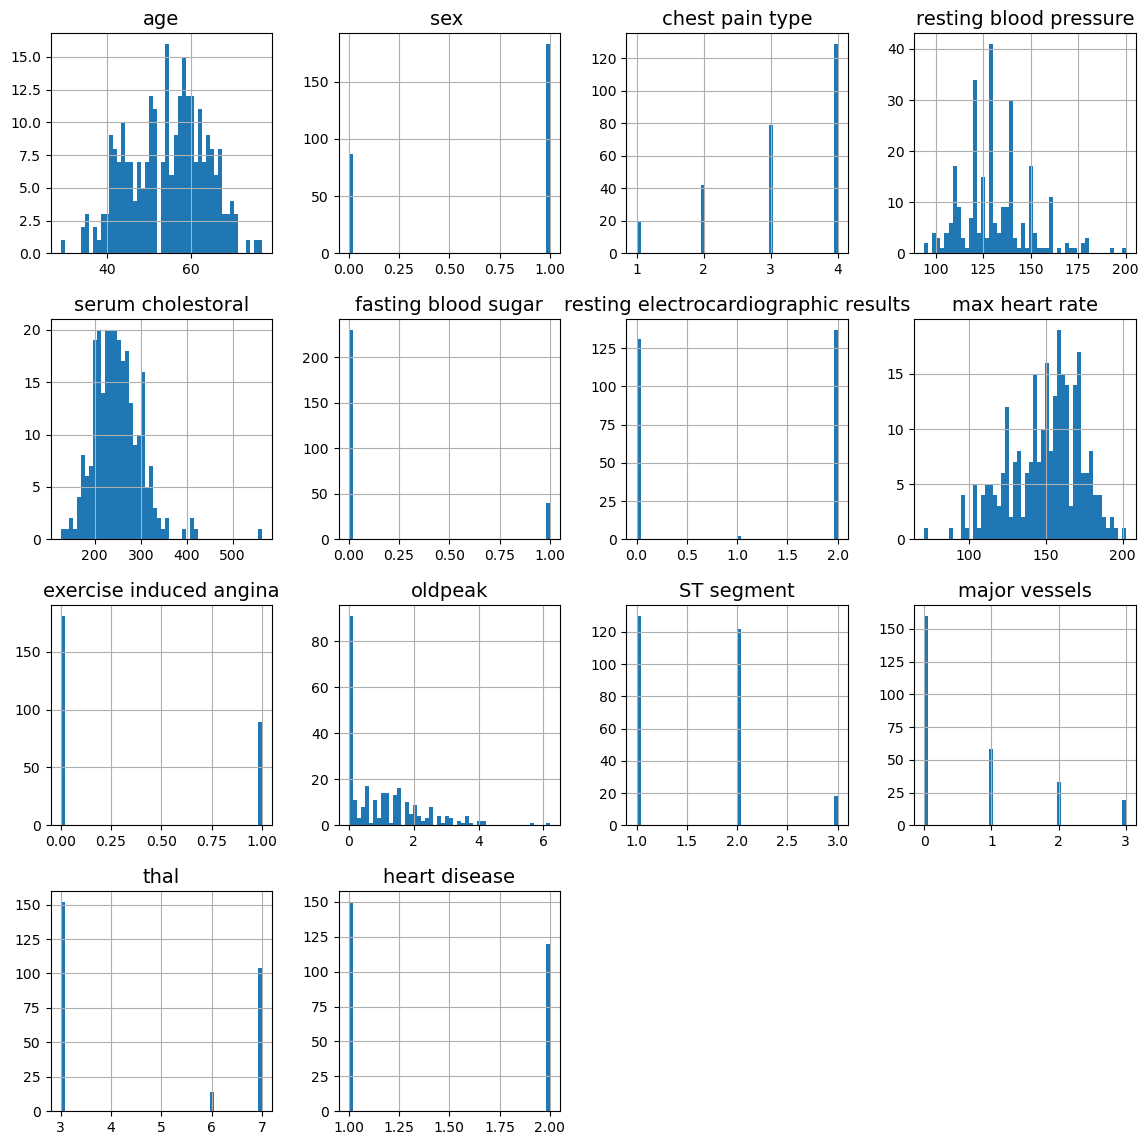

In [11]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

heart.hist(bins=50, figsize=(14, 14))

plt.show()

In [12]:
# checking the distribution of Target Variable
print(heart['heart disease'].value_counts())

heart disease
1    150
2    120
Name: count, dtype: int64


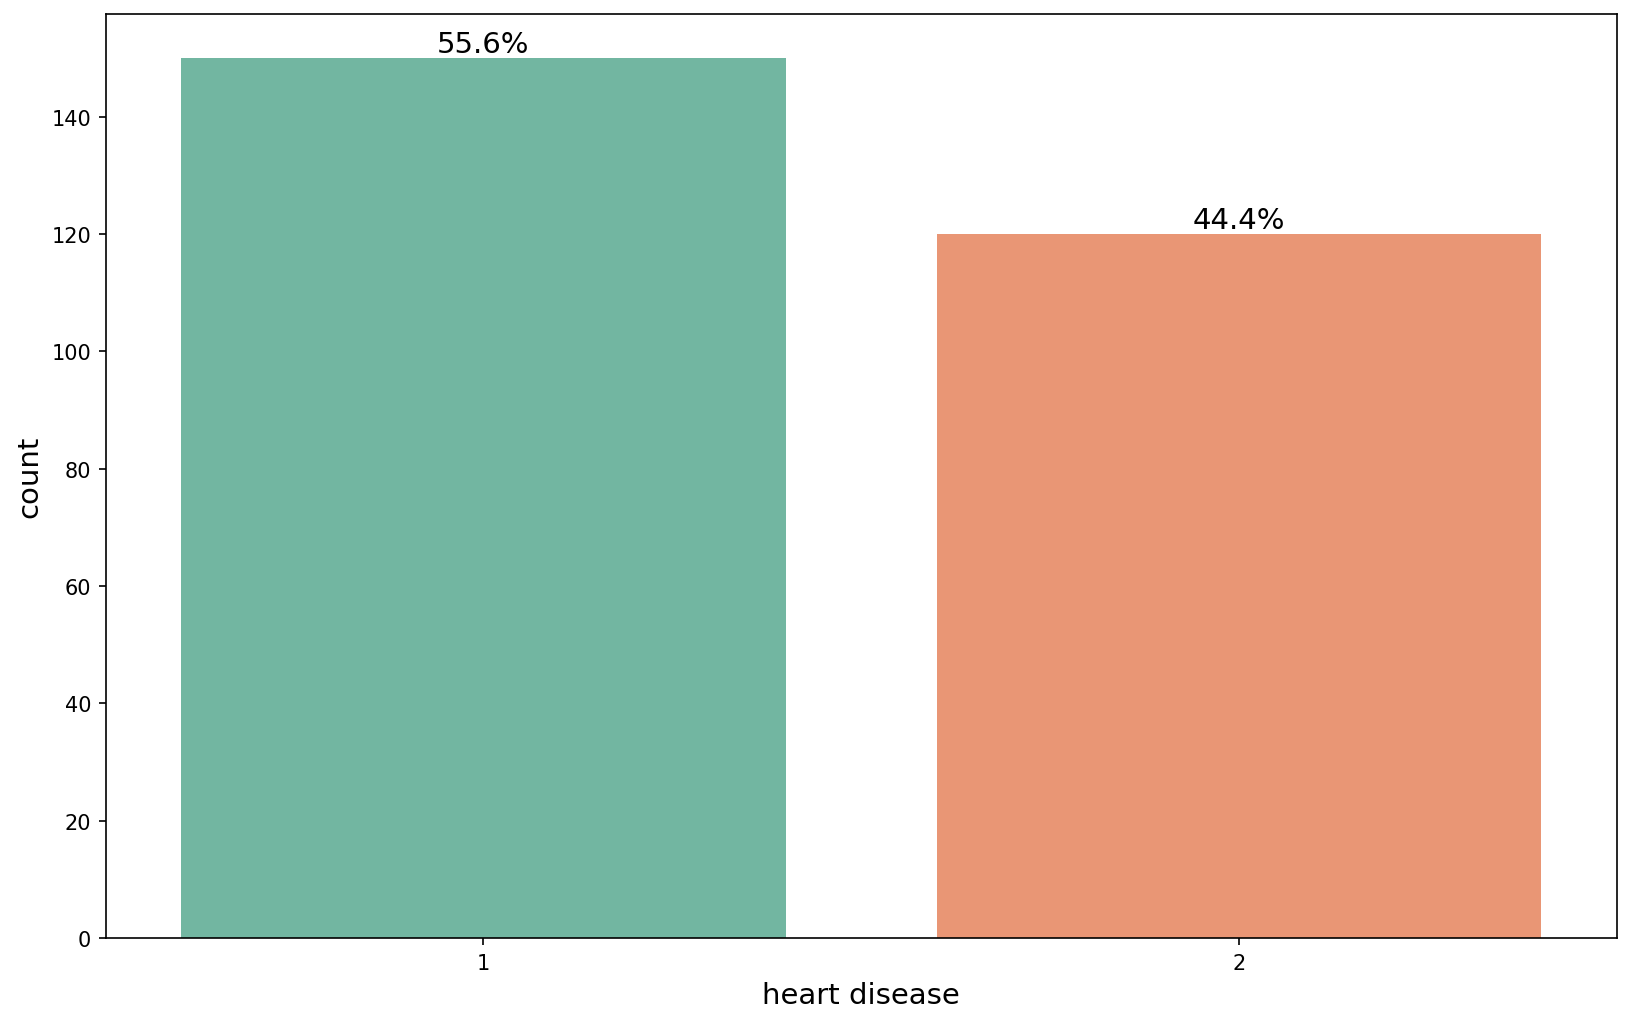

In [13]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(data=heart, x='heart disease', palette="Set2")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(heart)), (x.mean(), y), 
            ha='center', va='bottom')

In [14]:
X=heart.drop('heart disease',axis=1)
y=heart['heart disease']

In [15]:
X

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [16]:
y

0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: heart disease, Length: 270, dtype: int64

In [17]:
corr_matrix = X.corr()


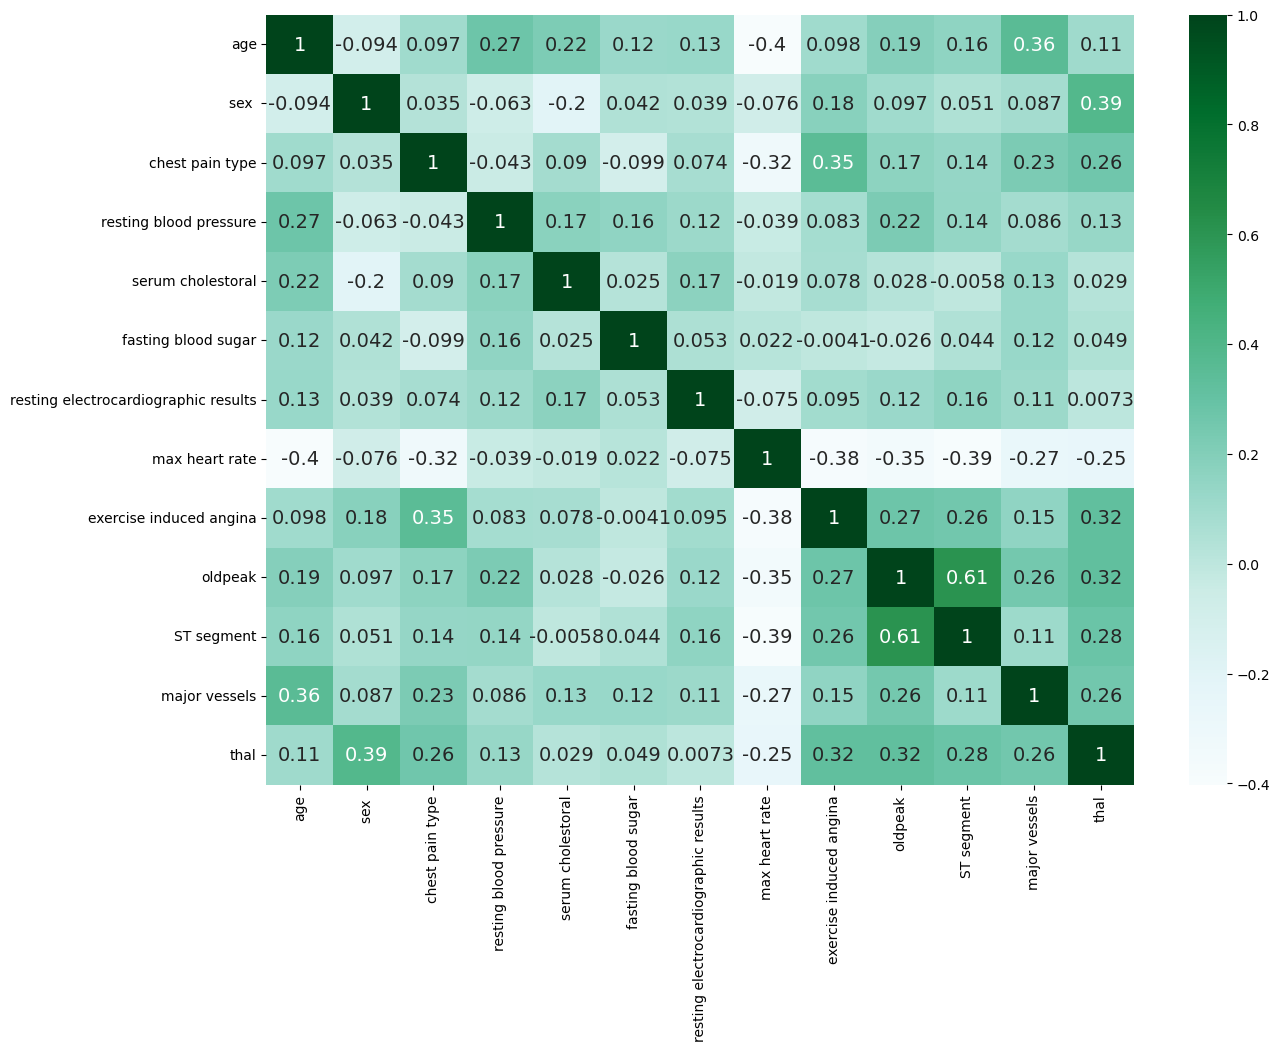

In [18]:
import seaborn as sns
plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'BuGn')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [20]:
X_train


,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
78,42,0,3,120,209,0,0,173,0,0.0,2,0,3
121,54,1,4,122,286,0,2,116,1,3.2,2,2,3
27,51,0,3,120,295,0,2,157,0,0.6,1,0,3
198,69,0,1,140,239,0,0,151,0,1.8,1,2,3
218,54,1,3,120,258,0,2,147,0,0.4,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,62,1,2,128,208,1,2,140,0,0.0,1,0,3
109,45,0,2,112,160,0,0,138,0,0.0,2,0,3
225,41,1,2,135,203,0,0,132,0,0.0,2,0,6
128,52,1,2,134,201,0,0,158,0,0.8,1,1,3


In [23]:
from sklearn.preprocessing import StandardScaler
df2 = heart.copy()
ss = StandardScaler()
df2[['age', 'resting blood pressure','serum cholestoral', 'max heart rate','oldpeak']] = ss.fit_transform(df2[['age','resting blood pressure','serum cholestoral', 'max heart rate','oldpeak']])

In [24]:
for col in heart.columns:
    if heart[col].dtypes != 'object':
        lower_limit, upper_limit = heart[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        heart[col] = np.where(heart[col]>upper_whisker,upper_whisker,np.where(heart[col]<lower_whisker,lower_whisker,heart[col]))

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
knn =KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier()

In [28]:
knn.fit(X_train, y_train)   
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

C:\Users\tinao\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [29]:
from sklearn.metrics import accuracy_score

y_pred = logreg.predict(X_test)
print('Logistic Regression Test Accuracy ', accuracy_score(y_test, y_pred ))


Logistic Regression Test Accuracy  0.8518518518518519


In [30]:
from sklearn.metrics import classification_report

def plot_classification_report(y_train, y_pred1, y_test, y_pred2, c_name):
    print("-"*25,c_name,"(TRAIN SET)","-"*25)
    print(classification_report(y_train, y_pred1))
    print("-"*25,c_name,"(Test SET)","-"*25)
    print(classification_report(y_test, y_pred2))

In [31]:
c_name= "Logistic Regression"
plot_classification_report(y_train, logreg.predict(X_train), y_test, logreg.predict(X_test), c_name)

------------------------- Logistic Regression (TRAIN SET) -------------------------
              precision    recall  f1-score   support

           1       0.86      0.90      0.88       120
           2       0.87      0.81      0.84        96

    accuracy                           0.86       216
   macro avg       0.86      0.86      0.86       216
weighted avg       0.86      0.86      0.86       216

------------------------- Logistic Regression (Test SET) -------------------------
              precision    recall  f1-score   support

           1       0.89      0.83      0.86        30
           2       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



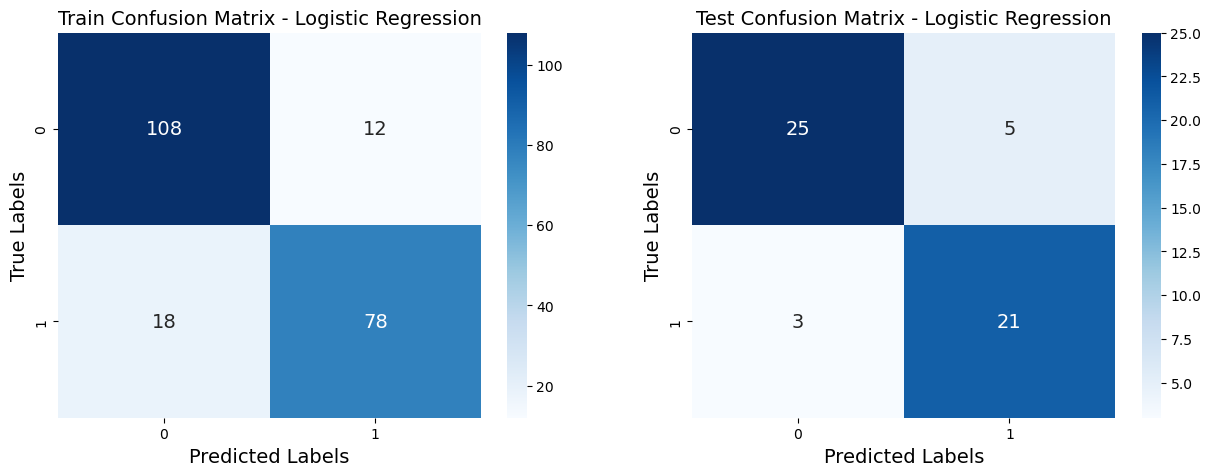

In [32]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_train_true, y_train_pred, y_test_true, y_test_pred, classifier_name):
    train_cm = confusion_matrix(y_train_true, y_train_pred)
    test_cm = confusion_matrix(y_test_true, y_test_pred)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Train Confusion Matrix
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title(f'Train Confusion Matrix - {classifier_name}')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')
    
    # Test Confusion Matrix
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
    axes[1].set_title(f'Test Confusion Matrix - {classifier_name}')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')
    
    plt.show()

# Generate confusion matrix for each classifier
plot_confusion_matrix(y_train, logreg.predict(X_train), y_test, logreg.predict(X_test), "Logistic Regression")
